### Video Games Dataset: EDA
#### 1. Describe Dataset
- **Who:** The data was acquired from Kaggle and supplied by the user Gregory Smith (https://www.kaggle.com/gregorut/videogamesales). The data was scraped from www.vgchartz.com. 
- **What:** The dataset contains a list of video games with sales greater than 100,000 from 1980 to 2020. It contains information such as the platform the game was made available, year of release, genre, publisher, sales in NA, sales in JP, sales in EU, sales in the rest of the world and global sales (total). The data set also includes the rank of games in terms of overall sales. **NOTE: Sales are in millions**
- **When:** The data set was last updated 4 years ago but contains games released from 1980 to seemingly 2020. 
- **Why:** The video game industry is a very competitive yet profitable industry. While big companies with large amounts of resources have an edge over smaller companies, we have recently seen many small companies finding huge success. Not only in game creation but in the case of streamers for example, playing a game before it becomes mainstream might give you an edge against bigger name streamers. With this data set, we are able to gain insight into general idea such as performance of companies, most popular titles and genres. We are also able to dive deeper and look at changing genre popularities over time, regional preference in game genres/platforms, upcoming developer etc.  
- **How:** The data set was scraped from the www.vgzchartz.com website using BeautifulSoup. The scraping script can be found here (https://github.com/GregorUT/vgchartzScrape)

#### 2. Load Dataset

In [12]:
import pandas as pd
import numpy as np
import altair as alt
from altair_saver import save
alt.renderers.enable('mimetype')
alt.data_transformers.enable('data_server')
# pip install altair-saver

DataTransformerRegistry.enable('data_server')

In [13]:
game = pd.read_csv("vgsales.csv")

#### 3. Explore Dataset

In [14]:
game.info()

print("\nPlatform:\n",game.Platform.unique(),"\nCount: ",game.Platform.nunique())
print("\nYear\n",game.Year.unique(),"\nCount: ",game.Year.nunique())
print("\nGenre\n",game.Genre.unique(),"\nCount: ",game.Genre.nunique())
print("\nPublishers\n",game.Publisher.unique()[0:15],"\nCount: ",game.Publisher.nunique())

print(game.sort_values("NA_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("EU_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("JP_Sales",ascending=False).head(5).iloc[:,0:6])
print(game.sort_values("Global_Sales",ascending=False).head(5).iloc[:,0:6])

print(game.groupby("Year").size())
print(game.groupby("Genre").size())
print(game.groupby("Platform").size())

nulls = game[game.isna().any(axis=1)] #List of games with nulls in any field 
game.sort_values("Name").loc[game.Name.isin(game.Name[game.Name.duplicated()]),["Name","Platform"]].head(15) #Game titles that show up on multiple platforms 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB

Platform:
 ['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' '3DS' 'PS4' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'GC' 'WiiU' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] 
Count:  31

Year
 [2006. 1985. 2008. 2009. 1996. 1989. 1984. 2005. 199

,Name,Platform
4499,007: Quantum of Solace,PS2
9318,007: Quantum of Solace,DS
1273,007: Quantum of Solace,X360
14547,007: Quantum of Solace,PC
3038,007: Quantum of Solace,Wii
1739,007: Quantum of Solace,PS3
2247,007: The World is not Enough,PS
1200,007: The World is not Enough,N64
15552,11eyes: CrossOver,PSP
15005,11eyes: CrossOver,X360


#### 4. Initial thoughts?
- We have null values in Year and Publisher (Total of 307 rows with NaN values)
- Year is a float, we could probably turn it into an int to make it prettier
- We have 31 unique Platforms
- We have 39 unique years (one being NaN)
- We have 12 unique genres
- We have 578 unique publishers
- Looking at the top games in each region EU and NA are more similar in taste than JP
    -JP loves their Pokemon
    -Nintendo is the dominating Publisher in all regions 
- Years with the most releases are 2006 to 2011 with a peak of 1431 releases in 2009.

#### 5. Wrangling
The main concern would be the NaN values. I feel the data is still valuable, we can remove/deal with those values on a need basis.

In [15]:
game.Year = game.Year.astype("Int64")
print(nulls.groupby("Year").size())
print(nulls.groupby("Genre").size())
print(nulls.groupby("Platform").size())

#For the analysis of sales - melting the NA,EU,JP,Other and Total columns
game_melt = game.melt(id_vars=["Rank", "Name","Platform","Year","Genre","Publisher"], 
        var_name="Region", 
        value_name="Sales").reset_index(drop=True)

Year
2004.0    19
2005.0     5
2007.0     1
2010.0     2
2011.0     3
2012.0     2
2014.0     2
2016.0     2
dtype: int64
Genre
Action          65
Adventure       12
Fighting        12
Misc            53
Platform        11
Puzzle          12
Racing          24
Role-Playing    18
Shooter         28
Simulation      19
Sports          42
Strategy        11
dtype: int64
Platform
2600    17
3DS     10
DS      32
GB       1
GBA     36
GC      14
N64      3
PC      22
PS       7
PS2     34
PS3     25
PSP     16
PSV      3
Wii     35
X360    31
XB      21
dtype: int64


#### 6. Research Questions/Visualization+Analysis

In [18]:
#1) Basic Exploratory visualisations of things we noted in the Initial Thoughts
#Counts of number of games in each genre, platform and number of games released in each year
#Genre and Platform counts are coloured by number of counts and sorted from largest to smallest
#Year counts are coloured by year and sorted from largest to smallest 
sorted_genre_count = list(game.groupby("Genre").size().sort_values(ascending=False).index)
sorted_year_count = list(game.groupby("Year").size().sort_values(ascending=False).index)
sorted_platform_count = list(game.groupby("Platform").size().sort_values(ascending=False).index)

genre_count = alt.Chart(game).mark_bar().encode(
    alt.X("Genre",type="nominal",sort=sorted_genre_count),
    alt.Y("count()",title="Number of games",type="quantitative"),
    alt.Color("count()",scale=alt.Scale(scheme='category20b'),legend=None),
    alt.Tooltip("count()"))

year_count = alt.Chart(game).mark_bar().encode(
    alt.X("Year",type="ordinal",sort=sorted_year_count),
    alt.Y("count()",title="Number of games",type="quantitative"),
    alt.Color("Year",scale=alt.Scale(scheme='category20c')),
    alt.Tooltip("count()"))

platform_count = alt.Chart(game).mark_bar().encode(
    alt.X("Platform",type="nominal",sort=sorted_platform_count),
    alt.Y("count()",title="Number of games",type="quantitative"),
    alt.Color("count()",scale=alt.Scale(scheme='category20b'),legend=None),
    alt.Tooltip("count()"))

count_plots = ((genre_count.properties(width=333)|platform_count.properties(width=666)).resolve_scale(color='independent')
               &year_count.properties(width=1000)).resolve_scale(color='independent').configure_axis(
                labelFontSize=12,
                titleFontSize=13)
count_plots = count_plots.properties(title={"text": "Number of games released by Genre, Platform and Year", 
      "subtitle": ["Counts only include games that have sold more than 100,000 copies. Bars for the Genre and Platform plot are coloured by number of games.",""]}).configure_title(fontSize = 25,subtitleFontSize=15)

#2) Lets look at sales across Genres for each Region
#Genres are sorted by decreasing Global Sales (Action is most sales vs Strategy is least)
#Notice we see Shooters - while having fewer games released, still sold a lot of copies meaning their titles seemed to do well and the same (to a larger extent) can be said about Platformers.
#Looking at the means of each genre, we can see exacly as we noticed above with the mean number of sales in the Shooter/Platform genre now ahead of the rest. 
#It is also interesting to see the trend across genres. We see NA, EU and Other sale patters tend to be more similar while JP sale patterns are distinct from the other regions, with a large emphasis on RPG, Platformers. 
sales_data = game_melt.loc[game_melt.Region != "Global_Sales",:]
sorted_genre_totalsales = list(game.groupby("Genre").sum().sort_values("Global_Sales",ascending=False).index)

genre_sales = alt.Chart(sales_data).mark_bar(opacity=0.5).encode(
    alt.X("Genre",type="nominal",sort=sorted_genre_totalsales),
    alt.Y("sum(Sales)",title="Total Number of Sales (in millions)",type="quantitative",stack=None),
    alt.Color("Region",scale=alt.Scale(scheme='set1'),type="nominal"),
    alt.Tooltip("Region"))
genre_sales = genre_sales+genre_sales.mark_circle()
genre_mean_sales = alt.Chart(sales_data).mark_bar(opacity=0.5).encode(
    alt.X("Genre",type="nominal",sort=sorted_genre_totalsales),
    alt.Y("mean(Sales)",title="Average Number of Sales (in millions)",type="quantitative",stack=None),
    alt.Color("Region",type="nominal"),
    alt.Tooltip("Region"))

genre_mean_sales = genre_mean_sales + genre_mean_sales.mark_circle()
genre_plots = (genre_sales | genre_mean_sales).properties(title={"text":"Comparing sales in each region by genre.","subtitle":["Bars and points represent number of sales in millions and coloured by Region.",""]}).configure_axis(
                labelFontSize=12,
                titleFontSize=13).configure_title(fontSize = 25,subtitleFontSize=15) 

#3) Lets investigate what's going on in each region. We can do so by looking at individual title by region and color the points by genre. Scatter plot: Top 3 games in each genre for each region 
    #This might help us explain and point out individual game titles that are dominating their genre.
sorted_genre_NA = list(sales_data[sales_data.Region=="NA_Sales"].groupby("Genre").sum().sort_values("Sales",ascending=False).index)    
sorted_genre_EU = list(sales_data[sales_data.Region=="EU_Sales"].groupby("Genre").sum().sort_values("Sales",ascending=False).index)      
sorted_genre_JP = list(sales_data[sales_data.Region=="JP_Sales"].groupby("Genre").sum().sort_values("Sales",ascending=False).index)    
sorted_genre_OT = list(sales_data[sales_data.Region=="Other_Sales"].groupby("Genre").sum().sort_values("Sales",ascending=False).index)    

genre_region = alt.Chart(sales_data).mark_bar(opacity=0.5).encode(
    alt.Y("Region",type="nominal",sort=sorted_genre_totalsales),
    alt.X("sum(Sales)",title="Total Number of Sales (in millions)",type="quantitative",stack=None),
    alt.Color("Region",scale=alt.Scale(scheme='set1'),type="nominal",legend=None))

title_NA =alt.Chart(sales_data[sales_data.Region=="NA_Sales"]).mark_circle(size=50).encode(
    alt.X("Genre",sort=sorted_genre_NA,title=None),
    alt.Y("Sales:Q",stack=None, title="Sales (in millions)"),
    alt.Color("Genre",scale=alt.Scale(scheme='category20')),
    alt.Tooltip("Name"))
title_NA = title_NA + alt.Chart(sales_data[sales_data.Region=="NA_Sales"].sort_values("Sales",ascending=False).iloc[:5,]).mark_text(align = "left", dx=10).encode(
    alt.X("Genre",sort=sorted_genre_NA),
    alt.Y("Sales:Q"),
    text="Name").properties(title="NA Sales")

title_JP =alt.Chart(sales_data[sales_data.Region=="JP_Sales"]).mark_circle(size=50).encode(
    alt.X("Genre",sort=sorted_genre_JP,title=None),
    alt.Y("Sales:Q",stack=None,title=None),
    alt.Color("Genre",scale=alt.Scale(scheme='category20')),
    alt.Tooltip("Name"))
title_JP = title_JP + alt.Chart(sales_data[sales_data.Region=="JP_Sales"].sort_values("Sales",ascending=False).iloc[:5,]).mark_text(align = "left", dx=10).encode(
    alt.X("Genre",sort=sorted_genre_JP),
    alt.Y("Sales:Q"),
    text="Name").properties(title="JP Sales")

title_EU =alt.Chart(sales_data[sales_data.Region=="EU_Sales"]).mark_circle(size=50).encode(
    alt.X("Genre",sort=sorted_genre_EU,title=None),
    alt.Y("Sales:Q",stack=None,title=None),
    alt.Color("Genre",scale=alt.Scale(scheme='category20')),
    alt.Tooltip("Name"))
title_EU = title_EU + alt.Chart(sales_data[sales_data.Region=="EU_Sales"].sort_values("Sales",ascending=False).iloc[:5,]).mark_text(align = "left", dx=10).encode(
    alt.X("Genre",sort=sorted_genre_EU),
    alt.Y("Sales:Q"),
    text="Name").properties(title="EU Sales")

title_OT =alt.Chart(sales_data[sales_data.Region=="Other_Sales"]).mark_circle(size=50).encode(
    alt.X("Genre",sort=sorted_genre_OT,title=None),
    alt.Y("Sales:Q",stack=None,title=None),
    alt.Color("Genre",scale=alt.Scale(scheme='category20')),
    alt.Tooltip("Name"))

title_OT = title_OT + alt.Chart(sales_data[sales_data.Region=="Other_Sales"].sort_values("Sales",ascending=False).iloc[:5,]).mark_text(align = "left", dx=10).encode(
    alt.X("Genre",sort=sorted_genre_OT),
    alt.Y("Sales:Q"),
    text="Name").properties(title="Other Sales")

name_sales = (title_NA.properties(width=250) | title_EU.properties(width=250) | title_JP.properties(width=250) | title_OT.properties(width=250))
name_sales = name_sales & genre_region.properties(width=1210).resolve_scale(color='independent')
name_sales = name_sales.properties(title={"text":"Distribution of games titles across each Region by Genre.","subtitle":["Top 5 games in each region are labelled. Overall Regional perfomance shown below.",""]}).configure_axis(
                labelFontSize=12,
                titleFontSize=13).configure_title(fontSize = 20,subtitleFontSize=15) 

#4) Growth of Game Genres, Publishers and Platforms over the Years
genre_data = pd.Series(game.groupby(['Year','Genre']).size().groupby('Year').size(), name='Genre')
pub_data = pd.Series(game.groupby(['Year','Publisher']).size().groupby('Year').size(), name='Publisher')
plat_data = pd.Series(game.groupby(['Year','Platform']).size().groupby('Year').size(), name='Platform')
rel_data = pd.concat([genre_data,pub_data,plat_data], axis=1).reset_index()

plot4=alt.Chart(rel_data).transform_fold(['Genre','Publisher','Platform']
).mark_bar(point=True).encode(
    x='Year:O',
    y=alt.Y('value:Q', axis=alt.Axis(title='Number of Genre/Publishers/Platforms')),
    color=alt.Color('key:N', legend=alt.Legend(title='Feature'))
).properties(width=1000)

#5) Maximum Annual Global Sales Numbers
plot5=alt.Chart(game).mark_line(point=True).encode(
    x='Year:N',
    y=alt.Y('max(Global_Sales):Q', axis=alt.Axis(title='Maximum Annual Global Sales'))
).properties(width=1000)

1) **Basic Exploratory visualizations of things we noted in the 'Initial Thoughts'**
- Counts of number of games in each genre, platform and number of games released in each year
- Genre and Platform counts are colored by number of counts and sorted from largest to smallest
- Year counts are colored by year and sorted from largest to smallest 
- We see Action is quite ahead of other genres in terms of numbers of games released, followed by Sports
- We see DS and PS2 have the highest number of games released in terms of Platform. 
- The years 2006-2011 have the highest number of game released. 

There are a ton of different ways to analyze this data set, lets just look at Genres for now.

In [21]:
rel_data[rel_data['Year'] < 1995]



,Year,Genre,Publisher,Platform
0,1980,5,2,1
1,1981,7,14,1
2,1982,7,18,1
3,1983,7,4,2
4,1984,7,4,2
5,1985,7,6,4
6,1986,6,6,2
7,1987,7,8,2
8,1988,8,7,4
9,1989,7,9,3


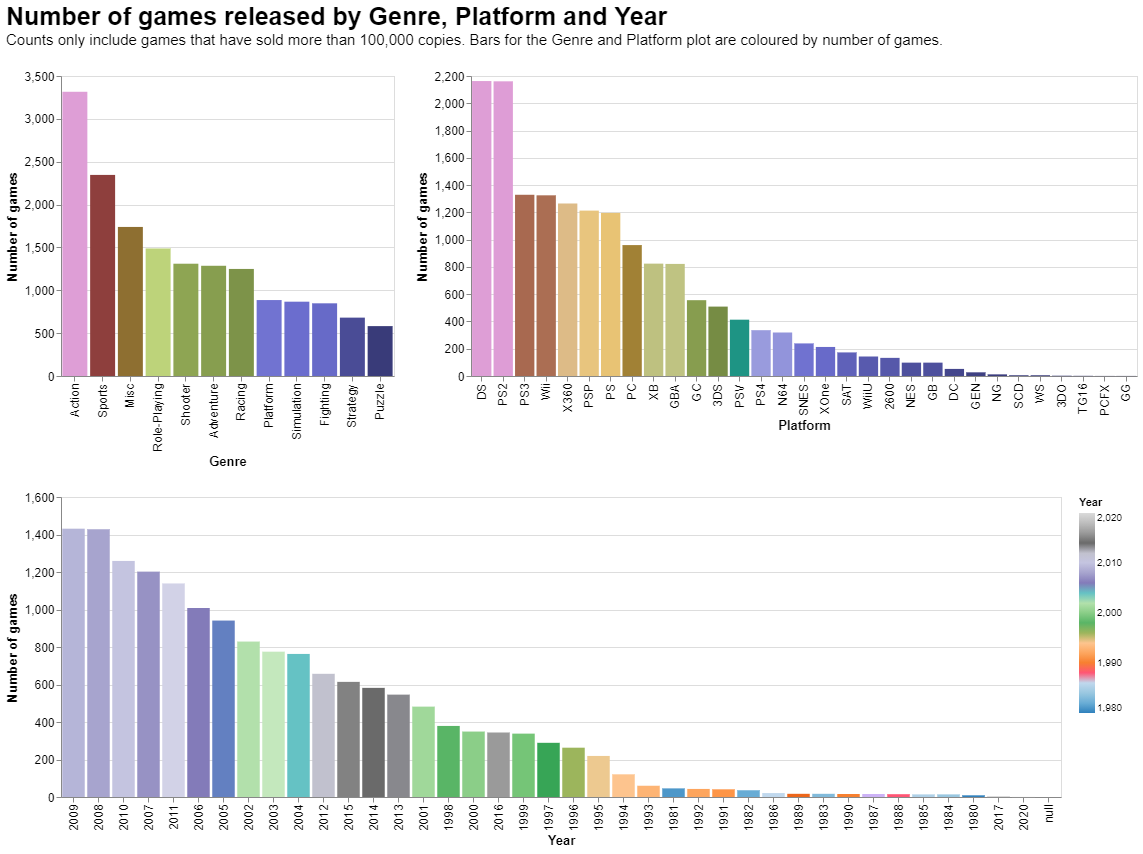

In [19]:
count_plots

2) **Sales across Genres for each Region**
- Genres are sorted by decreasing Global Sales (Action is most sales vs Strategy is least)
- Notice we see Shooters - while having fewer games released, still sold a lot of copies meaning their titles seemed to do well and the same (to a larger extent) can be said about Platformers.
- Looking at the means of each genre, we can see exactly as we noticed above with the mean number of sales in the Shooter/Platform genre now ahead of the rest. 
- It is also interesting to see the trend across genres. We see NA, EU and Other sale patters tend to be more similar while JP sale patterns are distinct from the other regions, with a large emphasis on RPG, Platformers.

Lets investigate what's going on in each region. We can do so by looking at individual titles by region. This might help us explain and point out individual game titles that are dominating their genre.

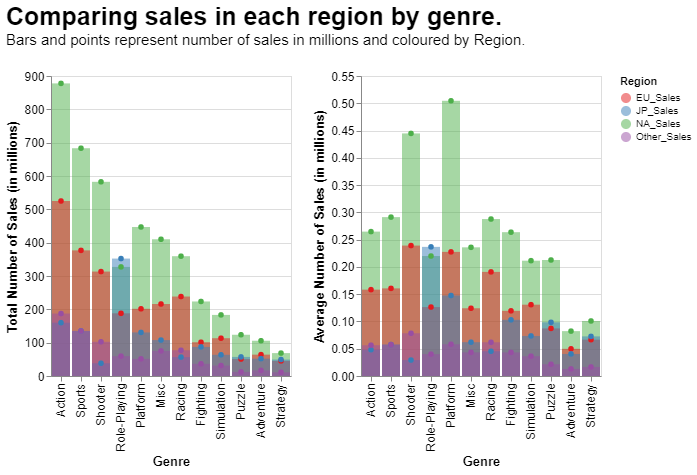

In [8]:
genre_plots

3) **Distribution of game titles by Genre across each Region**
- The top 5 titles in each region across genres are labeled. The genres are also sorted by most sales (left) to least sales (right). 
- Just by looking at the scales, it seems NA sells the most copies, followed by EU, JP and Other. This is also re-enforced by the bar plot below showing the total number of copies sold (in millions) by region. 
- Looking at genres across regions, we see NA, EU and Other are similar (as concluded from the plot before). While Action and Sports are still in the Top 3 genres for JP, we see RPG being first and Shooters being last.
- We see NA, EU and Other having similar Top 5 games, all having Wii Sports and Mario Kart.
- The JP region seems to love their RPG games which makes sense as they even have a subcategory named after them (JRPGs - Japanese RPGs)
- We see the bulk of games in most regions (except Other) lie around or below the 5 million copies sold mark and relatively few titles make it above.

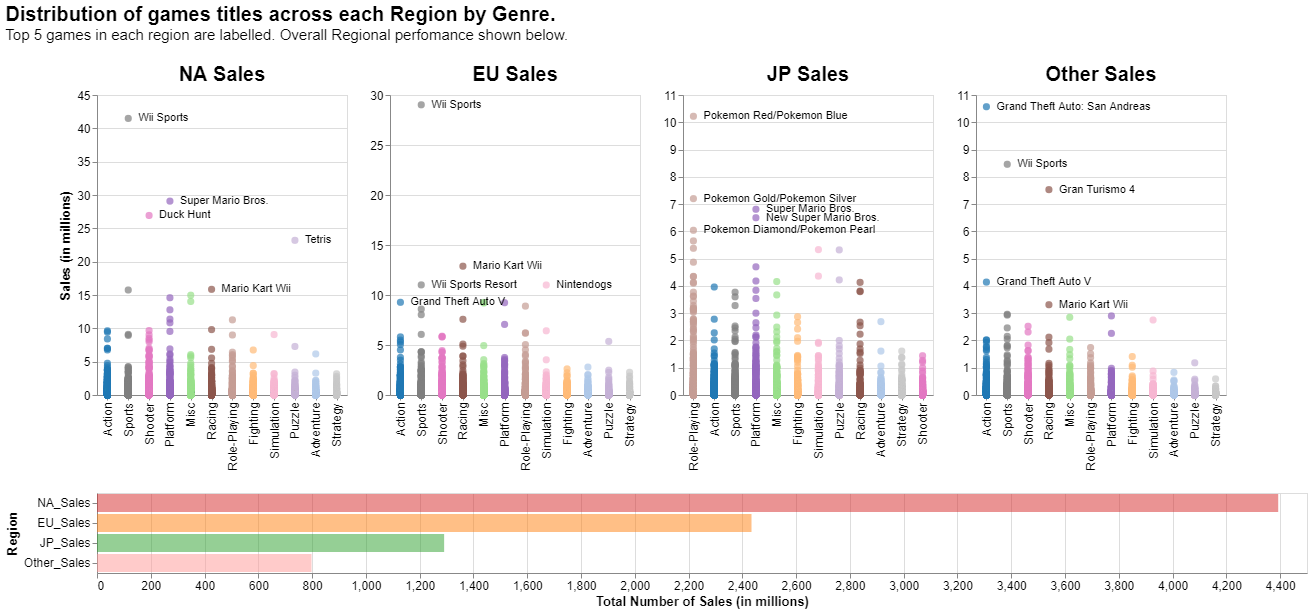

In [9]:
name_sales

4) **Growth of Game Genres, Publishers and Platforms over the Years**

- From our dataset we see that the year around 2010 were of highest games sales activity.
- In 1980 we had only two game companies/publishers make five genre of games. 
- Lots of different publishers entered the gaming market with over 180 gaming companies around 2010 offering different gaming products.
- Its interesting to see that the number of gaming consoles/platforms (like Xbox, PS5) have not increased. These consoles need bigger investment and only big gaming industry players held that market segment.

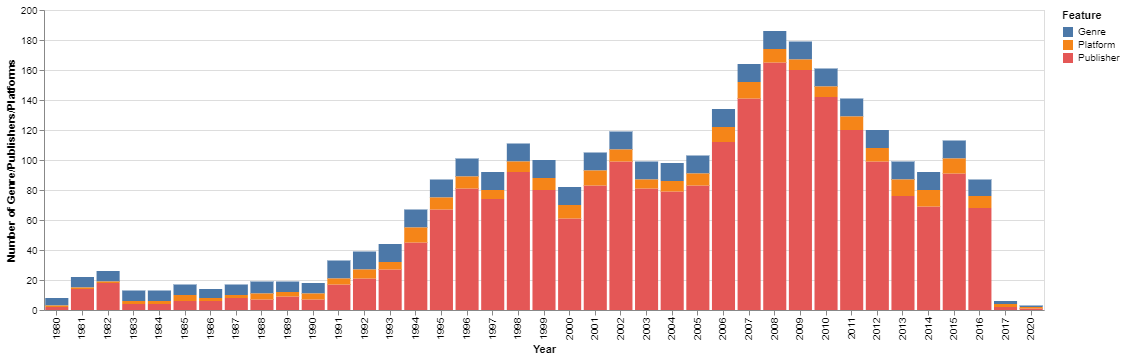

In [10]:
plot4

5) **Maximum Annual Global Sales Numbers**

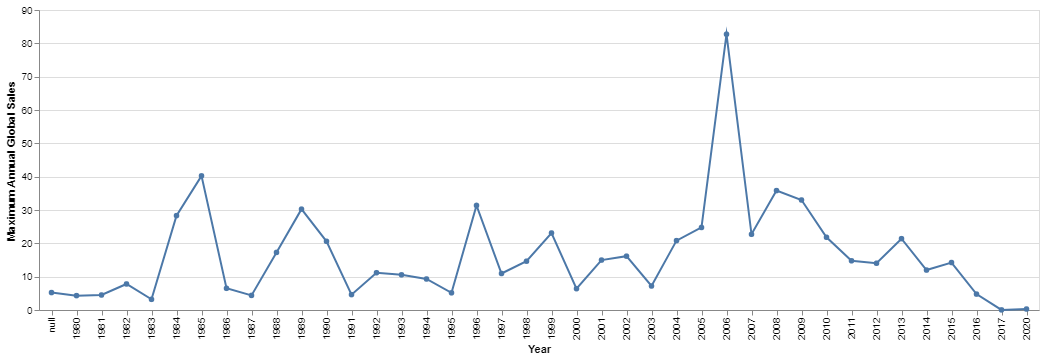

In [15]:
plot5

#### 7. Future Studies
1) **Revenue and marketing model of games**  
While this dataset can give us a general idea of popularity of games across years, genres, publishers and platforms, it does not necessarily tell us which genre is most profitable in terms of revenue.  
Currently, one of the largest gaming market is `Mobile Gaming` which would not have a metric such as `copies sold` but rather `downloads`. We also know some of the biggest games such as League of Legends, and DOTA 2 run off a "free to play" model for PC so they would also not have a "copies sold" metric. On top of that, a game that is free, take League of Legends for example, will make money through micro transactions (for example they made $1.75 billion dollars in 2020).  
As a more accurate analysis of how platforms, titles, developers and genres are performing in terms of revenue, popularity and activity, we might want to expand and improve the quality and type of data we are looking at. Certain things that we could use as better metrics: 
- Generic things such as: Game title, year of release, company, genre, platform
- We could look at copies sold AND downloads 
- We could look at concurrent players (as to get a sense of the size of the active player base) *This would be very useful in comparing multi player games and even peak hours of gaming
- The payment model of the game (single time purchase, subscription based, free-to-play)
- Reported revenue (could be trickier to find)
- We can also include things like development cost (could be trickier to find)
- Reviews/General consensus  

This could be very helpful from a companies perspective to narrow down on a target audience and possible find niche areas of the gaming community that show promise.

2) **Viewership and Entertainment**  
We could also expand our data set to analyze things in the streaming industry, where there is also big money to be had. Now a days, it seems like many people dream of being a streamer. Just to sit at home and play games all day while raking in large amounts of money, but it would be interesting to see certain stats such as, how much money do you need to break even (average living cost vs income from streaming broken down into views, subs, donations etc.) and to see how many people on platforms such as YouTube gaming, Twitch, Facebook gaming meet this threshold of 'success'. Things you would need would be:  
- List of streamers, platform they stream on, hours streamed, revenue
 
You could also look to see if certain genre of games or certain game titles themselves lead to better chances of success. For this you would need to further breakdown streamer information by game played, time streamed, views, donations and subscriptions received during that stream.  
Obviously, I feel a lot of this data would be difficult to obtain and that the success of a streamer is heavily influenced by personality, but it would be interesting to see if there is anything that can be identified to give upcoming streamers a slight advantage against big names.